<center><img src="http://www.ozyegin.edu.tr/sites/default/files/upload/Basin/ou_logo_tr.jpg"></center>

<center><h1>Predictive Analytics (IE 529)</h1></center>
<center><h2>Tutorial 5: ARIMA Example</h2></center>
<br>

In [1]:
# Packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.arima_process import arma_generate_sample
from pmdarima.arima import auto_arima

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

## Simulated Data
Let's generate some data from an ARMA process:

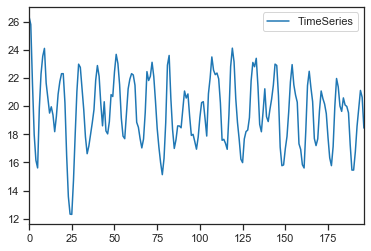

In [5]:
# Simulate an AR(2) process 

np.random.seed(12)
n_samples = int(200)
y=np.empty(n_samples)
e = np.random.normal(size=n_samples)

for t in range(2,n_samples):
    y[t] = 8+1.3*y[t-1] -0.7*y[t-2]+ e[t]
    
ardata = pd.DataFrame(y[3:],columns=["TimeSeries"])
ardata.plot()

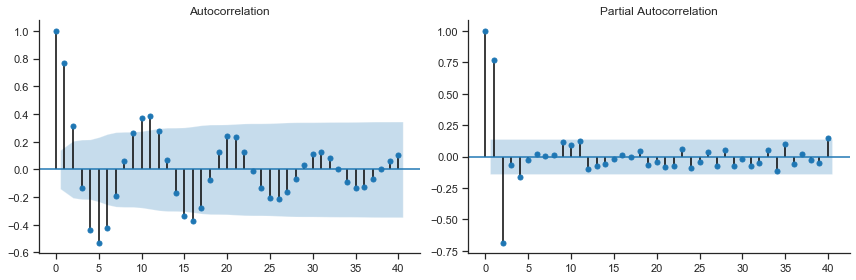

In [6]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sm.graphics.tsa.plot_acf(ardata, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(ardata, lags=40, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

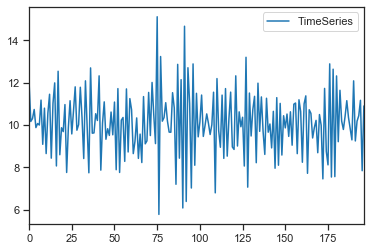

In [7]:
# Simulate an MA(2) process 

np.random.seed(18)
n_samples = int(200)
y=np.empty(n_samples)
e = np.random.normal(size=n_samples)

for t in range(2,n_samples):
    y[t] = 10+e[t]-1*e[t-1]+0.8*e[t-2]
    
madata = pd.DataFrame(y[3:],columns=["TimeSeries"])
madata.plot()

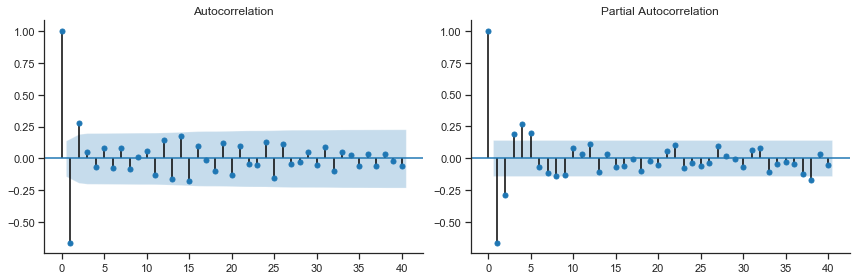

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sm.graphics.tsa.plot_acf(madata, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(madata, lags=40, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

Let's see if the simulated data fits to the theoretical model perfectly:

In [10]:
arima_sample=auto_arima(ardata,seasonal=False)
arima_sample.summary()

C:\Users\enisk\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\enisk\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\enisk\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  197
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -289.769
Date:                Thu, 24 Dec 2020   AIC                            591.538
Time:                        13:07:49   BIC                            611.237
Sample:                             0   HQIC                           599.512
                                - 197                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.5256      0.739      8.834      0.000       5.078       7.973
ar.L1          1.4518      0.062     23.347      0.000       1.330       1.574
ar.L2         -0.7848      0.054    -14.595      0.000      -0.890      -0.679
ma.L1         -0.1391      0.097     -1.432      0.152      -0.330       0.051
ma.L2         -0.1298      0.093     -1.399      0.162      -0.312       0.052
sigma2         1.0951      0.108     10.153      0.000       0.884       1.306
===================================================================================
Ljung-Box (Q):                       34.09   Jarque-Bera (JB):                 3.29
Prob(Q):                              0.73   Prob(JB):                         0.19
Heteroskedasticity (H):               0.76   Skew:                             0.27
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
arima1 = sm.tsa.ARIMA(ardata, order=(2, 0, 0)).fit(trend='c')
arima1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             TimeSeries   No. Observations:                  197
Model:                     ARMA(2, 0)   Log Likelihood                -291.429
Method:                       css-mle   S.D. of innovations              1.056
Date:                Thu, 24 Dec 2020   AIC                            590.857
Time:                        13:08:45   BIC                            603.990
Sample:                             0   HQIC                           596.174
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               19.5967      0.200     98.162      0.000      19.205      19.988
ar.L1.TimeSeries     1.3542      0.049     27.487      0.000       1.258       1.451
ar.L2.TimeSeries    -0.7316      0.050    -14.688      0.000      -0.829      -0.634
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9255           -0.7144j            1.1691           -0.1046
AR.2            0.9255           +0.7144j            1.1691            0.1046
-----------------------------------------------------------------------------
"""

Example: Seasonally adjusted electrical equipment orders. Let's plot the time series first


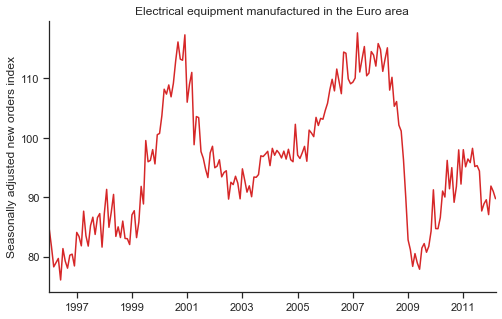

In [12]:
eeadj=pd.read_csv('eeadj.csv')['x']
eeadj.index=pd.date_range(start='01/Jan/1996', periods=195, freq='M')
fig, ax= plt.subplots(figsize=(8,5))
eeadj.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Seasonally adjusted new orders index')
ax.set_title('Electrical equipment manufactured in the Euro area')
ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
plt.show()

Let's examine the ACF and the PACF of the series.

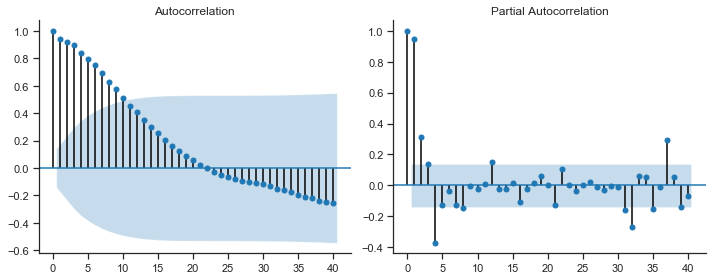

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sm.graphics.tsa.plot_acf(eeadj, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(eeadj, lags=40, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

The plot shows some sudden changes, e.g., 2008/2009 (global economic environment). Otherwise there is nothing unusual about the plot and no need to do any data adjustments.
<br>
There is no evidence of changing variance, so no need for a transformation.
<br>
The data are clearly non-stationary as the series wanders up and down for long periods. Consequently, we will take a first difference of the data. 


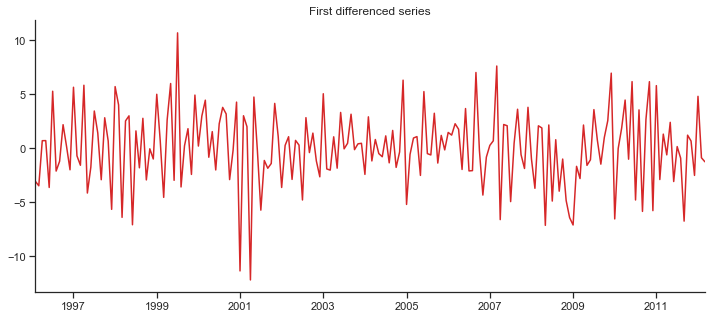

In [14]:
diff=eeadj-eeadj.shift(1)
diff=diff.dropna()

fig, ax= plt.subplots(figsize=(12,5))
diff.plot(color=red)
ax.set_xlabel('')
ax.set_title('First differenced series')
ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
plt.show()

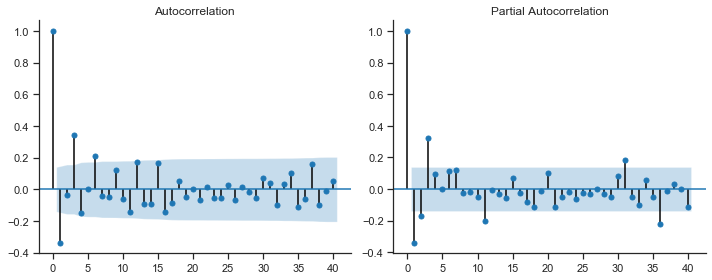

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sm.graphics.tsa.plot_acf(diff, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff, lags=40, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()

The PACF is suggestive of an AR(3) model. So an initial candidate model is an ARIMA(3,1,0). 

In [16]:
arima1 = sm.tsa.ARIMA(eeadj, order=(3, 1, 0)).fit(trend='nc') # trend='nc' option estimates a model without a drift
print(arima1.summary())
print("sigma^2 is estimated as:",round(arima1.sigma2,3))
print("AICc is estimated as:",round(arima1.aic+2*(arima1.df_model+1)*(arima1.df_model+2)/(arima1.nobs-arima1.df_model-2),3))

                             ARIMA Model Results                              
Dep. Variable:                    D.x   No. Observations:                  194
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -493.801
Method:                       css-mle   S.D. of innovations              3.081
Date:                Thu, 24 Dec 2020   AIC                            995.601
Time:                        13:09:55   BIC                           1008.673
Sample:                    02-29-1996   HQIC                          1000.894
                         - 03-31-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.x     -0.3418      0.068     -5.018      0.000      -0.475      -0.208
ar.L2.D.x     -0.0426      0.073     -0.588      0.557      -0.185       0.099
ar.L3.D.x      0.3185      0.068      4.669      0.0

Try your chosen model(s), and use the AICc to search for a better model.
<br>
We fit an ARIMA(3,1,0) model along with variations including ARIMA(4,1,0), ARIMA(2,1,0),  ARIMA(3,1,1), etc. Of these, the ARIMA(3,1,1) has a slightly smaller AICc value.


In [28]:
arima2 = sm.tsa.ARIMA(eeadj, order=(3, 1, 1)).fit(trend='nc') # trend='nc' option estimates a model without a drift
print(arima2.summary())
print("sigma^2 is estimated as:",round(arima2.sigma2,3))
print("AICc is estimated as:",round(arima2.aic+2*(arima2.df_model+1)*(arima2.df_model+2)/(arima2.nobs-arima2.df_model-2),3))

                             ARIMA Model Results                              
Dep. Variable:                    D.x   No. Observations:                  194
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -492.688
Method:                       css-mle   S.D. of innovations              3.063
Date:                Thu, 24 Dec 2020   AIC                            995.376
Time:                        19:27:51   BIC                           1011.715
Sample:                    02-29-1996   HQIC                          1001.992
                         - 03-31-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.x      0.0044      0.220      0.020      0.984      -0.427       0.436
ar.L2.D.x      0.0916      0.098      0.931      0.352      -0.101       0.284
ar.L3.D.x      0.3698      0.067      5.523      0.0

Always remember to check the residuals

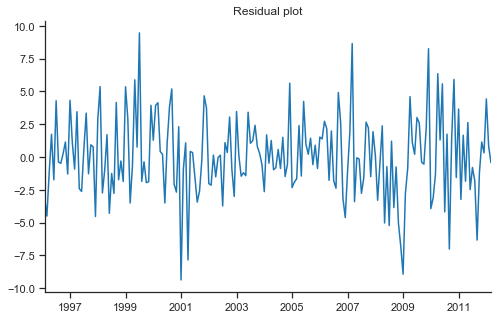

In [18]:
resid=arima2.resid
fig, ax= plt.subplots(figsize=(8,5))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

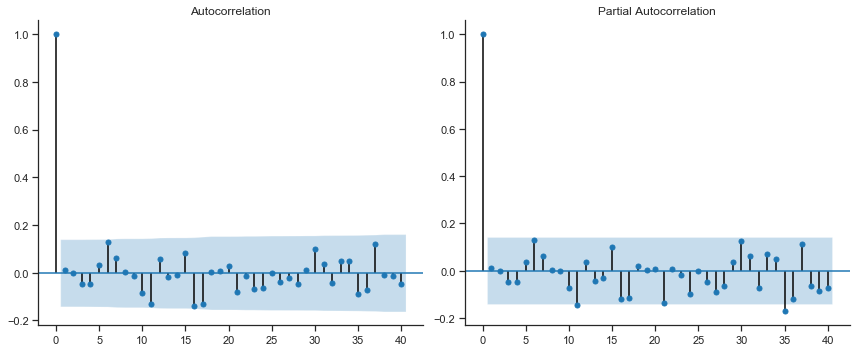

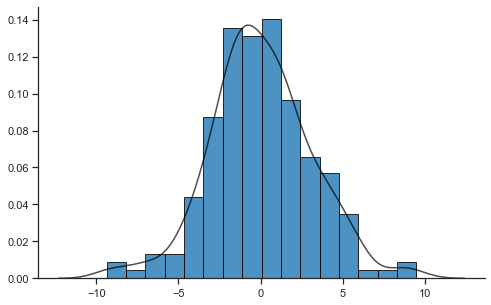

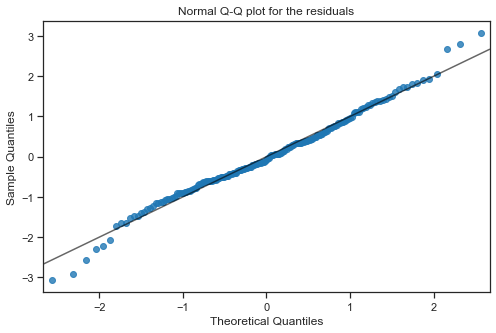

In [19]:
from forecast import histogram, qq_plot

fig, ax = plt.subplots(1,2, figsize=(12,5))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax[1])
sns.despine()
fig.tight_layout()
plt.show()


histogram(resid)
plt.show()
qq_plot(resid)
plt.show()



The ACF plot of the residuals from the ARIMA(3,1,1) model shows all correlations within the threshold limits indicating that the residuals are behaving like white noise. You can also run a LjungBox test for lag 24, see below. Since p-value is very large, suggesting the residuals are not autocorrolated. However, normality assumptions should be checked.  


In [20]:
diag.acorr_ljungbox(resid, lags=24, boxpierce=False)[1][23]

0.4650971900914297

Finally, we calculate forecasts. The following command gives the point forecasts, standard errors in the forecasts, as well as range (in this case with 80% confidence level) forecasts.

In [21]:
 arima2.forecast(steps=8, alpha=0.2)

(array([91.62385186, 91.19359125, 90.90134872, 91.54970171, 91.36668223,
        91.31717331, 91.5399808 , 91.46874648]),
 array([3.06257461, 3.59110667, 4.18579434, 5.25413323, 5.93789475,
        6.63487758, 7.41146315, 8.06118763]),
 array([[ 87.69900457,  95.54869915],
        [ 86.59140288,  95.79577962],
        [ 85.53703743,  96.26566001],
        [ 84.81625905,  98.28314438],
        [ 83.75696391,  98.97640055],
        [ 82.81423555,  99.82011106],
        [ 82.0418086 , 101.038153  ],
        [ 81.13791886, 101.7995741 ]]))

You can also run auto_arima algorithm to find the best values for your ARIMA model.

In [25]:
arima3=auto_arima(eeadj,seasonal=False)

In [26]:
arima3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  195
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -492.683
Date:                Thu, 24 Dec 2020   AIC                            997.366
Time:                        15:58:29   BIC                           1016.973
Sample:                             0   HQIC                          1005.306
                                - 195                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0130      0.137      0.095      0.925      -0.255       0.281
ar.L1          0.0038      0.159      0.024      0.981      -0.309       0.316
ar.L2          0.0912      0.100      0.911      0.362      -0.105       0.288
ar.L3          0.3697      0.066      5.604      0.000       0.240       0.499
ma.L1         -0.3916      0.193     -2.031      0.042      -0.769      -0.014
sigma2         9.3802      0.902     10.396      0.000       7.612      11.149
===================================================================================
Ljung-Box (Q):                       36.12   Jarque-Bera (JB):                 4.06
Prob(Q):                              0.65   Prob(JB):                         0.13
Heteroskedasticity (H):               1.20   Skew:                             0.06
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

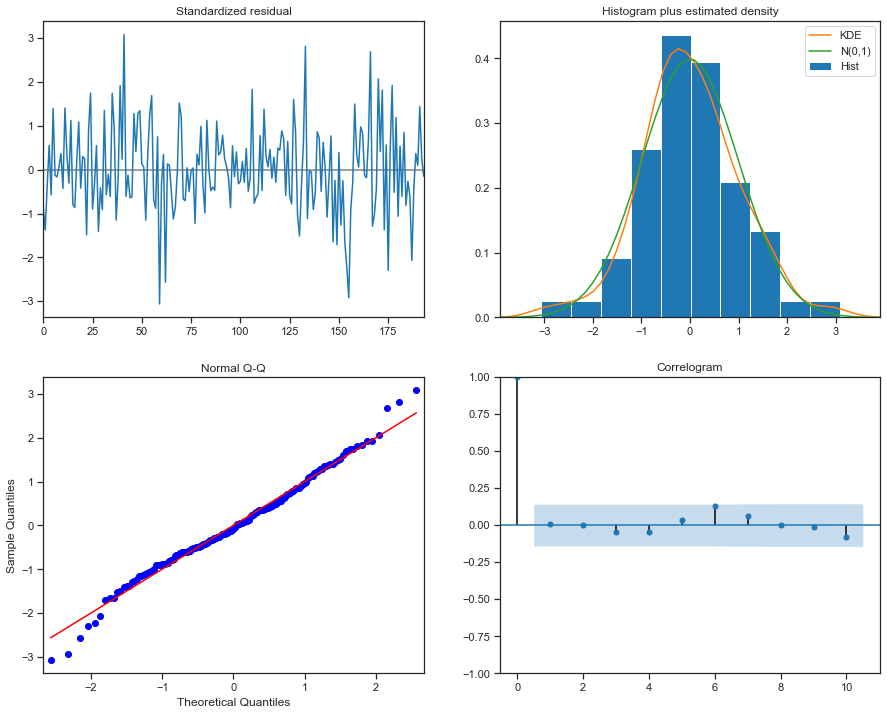

In [24]:
arima3_diag=arima3.plot_diagnostics(figsize=(15, 12))